# Modules Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("../data/data_processed.csv",sep=";")

In [2]:
print(df.shape)

(3298, 8)


In [6]:
df

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput,SINR,qos
0,9:39:11.769,224.0,0,-77.0,-5.0,0.0,2.781513,0.0
1,9:39:12.769,224.0,0,-77.0,-5.0,0.0,2.781513,0.0
2,9:39:13.769,224.0,0,-77.0,-5.0,0.0,2.781513,0.0
3,9:39:14.769,224.0,0,-77.0,-7.0,0.0,0.781513,0.0
4,9:39:15.769,224.0,0,-77.0,-6.0,14.7,1.781513,0.5
...,...,...,...,...,...,...,...,...
3293,10:36:19.684,224.0,1,-75.0,-7.0,20.8,13.000000,1.0
3294,10:36:20.684,224.0,1,-75.0,-9.0,22.7,11.000000,0.5
3295,10:36:21.684,224.0,1,-75.0,-9.0,16.7,11.000000,0.5
3296,10:36:22.684,224.0,1,-75.0,-9.0,22.1,11.000000,0.5


In [3]:
df_KMeans = df.drop(columns=["SINR", "qos"])

In [4]:
df_KMeans

,Time,Physical cell identity (pcell),Band (pcell),RSRP (pcell),RSRQ (pcell),RLC downlink throughput
0,9:39:11.769,224.0,0,-77.0,-5.0,0.0
1,9:39:12.769,224.0,0,-77.0,-5.0,0.0
2,9:39:13.769,224.0,0,-77.0,-5.0,0.0
3,9:39:14.769,224.0,0,-77.0,-7.0,0.0
4,9:39:15.769,224.0,0,-77.0,-6.0,14.7
...,...,...,...,...,...,...
3293,10:36:19.684,224.0,1,-75.0,-7.0,20.8
3294,10:36:20.684,224.0,1,-75.0,-9.0,22.7
3295,10:36:21.684,224.0,1,-75.0,-9.0,16.7
3296,10:36:22.684,224.0,1,-75.0,-9.0,22.1


# Train/Test Split

In [7]:
from sklearn.model_selection import train_test_split
features = ['RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput', 'SINR']
X = df[features].values
y = df['qos'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalization

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Scale features to the range [0, 1] using MinMaxScaler
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [12]:
# Function to convert QoS score to a textual label
def qos_label_from_score(score):
    if score >= 0.75:
        return "Good"
    elif 0.4 <= score < 0.75:
        return "Average"
    elif 0.15 <= score < 0.4:
        return "Low"
    else:
        return "Bad"

# Create a comparison DataFrame with actual vs predicted values and convert to text labels
comparison = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})
comparison['Actual QoS'] = comparison['Actual Values'].apply(qos_label_from_score)
comparison['Predicted QoS'] = comparison['Predicted Values'].apply(qos_label_from_score)

# Display the first 15 rows
print(comparison.head(15))


    Actual Values  Predicted Values Actual QoS Predicted QoS
0             0.0          0.105562        Bad           Bad
1             0.1          0.098717        Bad           Bad
2             0.5          0.611456    Average       Average
3             0.5          0.291693    Average           Low
4             0.0          0.103973        Bad           Bad
5             0.5          0.518332    Average       Average
6             0.0          0.099821        Bad           Bad
7             0.5          0.600002    Average       Average
8             0.5          0.454524    Average       Average
9             0.1          0.087767        Bad           Bad
10            0.5          0.295270    Average           Low
11            0.5          0.583026    Average       Average
12            0.1          0.091301        Bad           Bad
13            0.5          0.412764    Average       Average
14            0.5          0.618718    Average       Average


# Apply K-Means Clustering

   Physical cell identity (pcell)  Band (pcell)  Cluster
0                           224.0             0        0
1                           224.0             0        0
2                           224.0             0        0
3                           224.0             0        0
4                           224.0             0        1


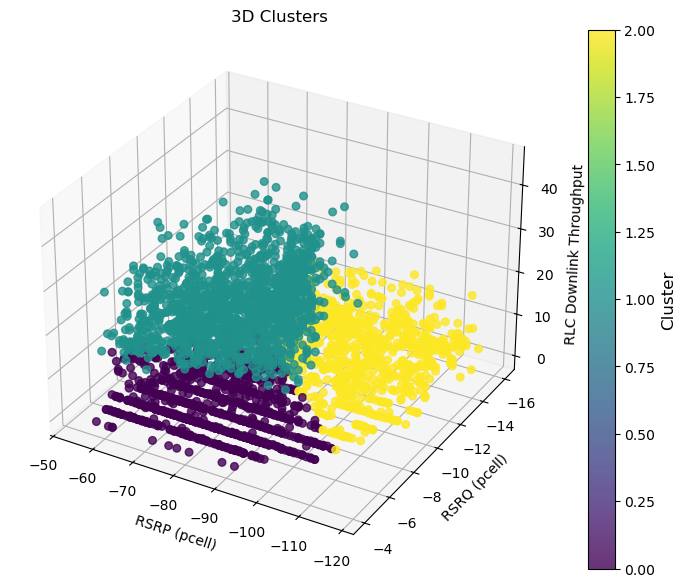

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data 
df3 = df_KMeans.copy()

# 🔹 Select relevant columns for clustering
features = ["RSRP (pcell)", "RSRQ (pcell)", "RLC downlink throughput"]
X = df3[features].copy()  # Create a copy to avoid warnings

# 🔹 Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Apply K-Means with the optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df3["Cluster"] = kmeans.fit_predict(X_scaled)  # Add cluster labels

# 🔹 Display clustering results
df3_clustered = df3[["Physical cell identity (pcell)", "Band (pcell)", "Cluster"]]
print(df3_clustered.head())

# 🔹 Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(df3["RSRP (pcell)"], df3["RSRQ (pcell)"], df3["RLC downlink throughput"],
                c=df3["Cluster"], cmap="viridis", marker="o", s=30, alpha=0.8)

ax.set_xlabel("RSRP (pcell)")
ax.set_ylabel("RSRQ (pcell)")
ax.set_zlabel("RLC Downlink Throughput")
ax.set_title("3D Clusters")

ax.view_init(elev=30, azim=120)
ax.grid(True, linestyle="--", alpha=0.5)

cbar = plt.colorbar(sc, label="Cluster")
cbar.set_label("Cluster", fontsize=12)

plt.show()


# Create a linear regression model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
model = LinearRegression()
model.fit(X_train, y_train)
columns_to_scale = ['RSRP (pcell)', 'RSRQ (pcell)', 'RLC downlink throughput']


# Make predictions on the test data

In [42]:
y_pred = model.predict(X_test)

# Model Evaluation

Mean Squared Error (MSE): 0.015200181101421904
Coefficient of Determination (R²): 0.7302511392878623


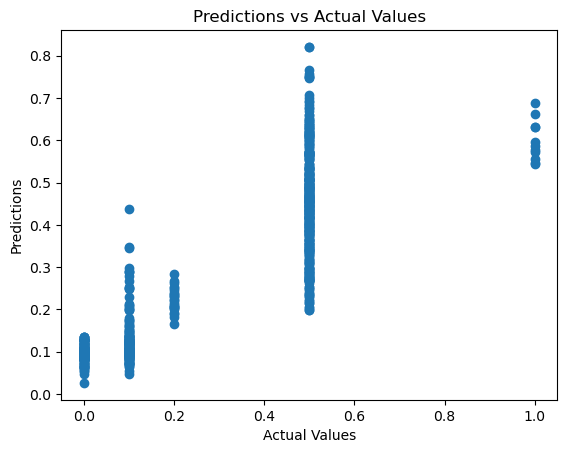

In [43]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the coefficient of determination (R²)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R²): {r2}")

# Display predictions versus actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual Values')
plt.show()


In [10]:
# Predict target values for the test set
y_pred = Regressor.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
comparison = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_pred})
print(comparison)


     Actual Values  Predicted Values
0              0.0          0.105562
1              0.1          0.098717
2              0.5          0.611456
3              0.5          0.291693
4              0.0          0.103973
..             ...               ...
655            0.1          0.148183
656            0.0          0.104480
657            0.1          0.278781
658            0.5          0.564883
659            0.1          0.108673

[660 rows x 2 columns]


# XGBoost Model

In [44]:
import stable_baselines3

print(stable_baselines3.__version__)


2.6.0


In [45]:
pip install xgboost


In [46]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [49]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Create and train the XGBoost regressor
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
Y_pred_xgb = model_xgb.predict(X_test)




Mean Squared Error (MSE) - XGBoost: 9.881651274911804e-05
Coefficient of Determination R^2 - XGBoost: 0.9982463602534889


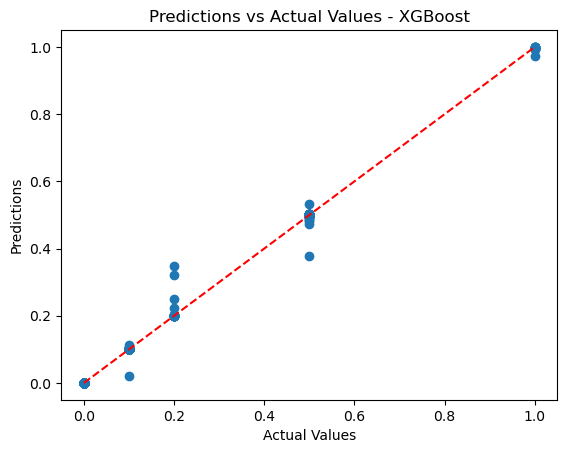

In [50]:
# Evaluate the model performance
mse_xgb = mean_squared_error(y_test, Y_pred_xgb)
r2_xgb = r2_score(y_test, Y_pred_xgb)

print(f"Mean Squared Error (MSE) - XGBoost: {mse_xgb}")
print(f"Coefficient of Determination R^2 - XGBoost: {r2_xgb}")

# Plot predictions vs actual values
plt.scatter(y_test, Y_pred_xgb)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Predictions vs Actual Values - XGBoost')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # reference line y=x
plt.show()